<a href="https://colab.research.google.com/github/allie-touchstone/Advanced-Machine-Learning/blob/main/MIS382N_HW5_Questions_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Allie Touchstone

EID: awt529

Name: Avery Shepherd

EID: ams9694

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:
The concepts of Gradient Boosting are being able to use the differentiable loss function as a technique to solve classification and regression problems as well being able to search for approximate solutions to the additive modeling problems. Adaboost is different as it re-weighs the data in each iteration. Adaboose minimizes the exponential loss function that makes the algorithm susceptible to outliers. It is not as flexible as the gradient boosting, as it is best used in binary classifcation problems and in boosting decision trees. The two methods differ in how they deal with errors/ outliers. In gradient boosting, the weak learners are identified through gradients, while in Adaboosting, they are identified by high-weighted data points. 


# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [ ]:
def plot_model(X, y, svc, kernel='linear'):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

  x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = (x0_max / x0_min)/100
  xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

  plt.subplot(1, 1, 1)
  y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
  y_pred = y_pred.reshape(xx0.shape)
  plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx0.min(), xx0.max())
  plt.title('SVC with {} kernel'.format(kernel))
  plt.show()

In [ ]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
  svc = svm.SVC(kernel=kernel, C=C, gamma=gamma) # IMPLEMENT ME!
  
  svc.fit(X, y)
  return svc

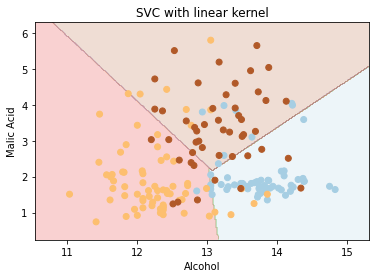

In [ ]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

## Answer:
a. plotted above

b. The model's boundaries changed from straight lines to curved lines. This also starts to better section each of the data point colors.

c. The same thing happened when the gamma was changed. The boundaries became more curved as the sections seperate the different color data points to a much more significant degree.

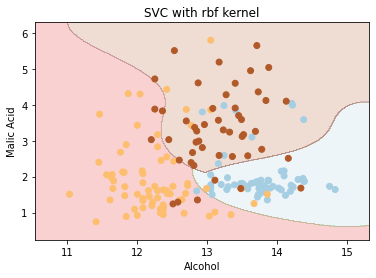

In [ ]:
svc = train_model(X, y, kernel = 'rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel= 'rbf') 

0.5,1,10,100

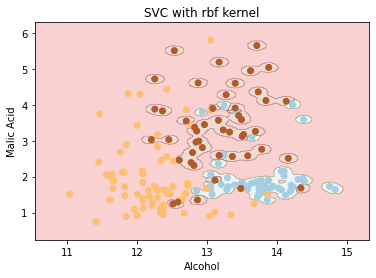

In [ ]:
svc = train_model(X, y, kernel = 'rbf', C=1, gamma=100)
plot_model(X, y, svc, kernel= 'rbf') 

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


### (A)

In [ ]:
def train_model(X_train, X_test, y_train, y_test, mod):
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    return accuracy_score(y_test, pred), roc_auc_score(y_test, mod.predict_proba(X_test)[:, 1])

In [ ]:
clf = DecisionTreeClassifier(random_state=10)

print('(accuracy score, roc auc score)')

train_model(X_train, X_test, y_train, y_test, clf)

(accuracy score, roc auc score)


(0.9098090849242922, 0.9040453749567611)

In [ ]:
clf = LogisticRegression(random_state=10, solver="newton-cg")

print('(accuracy score, roc auc score)')

train_model(X_train, X_test, y_train, y_test, clf)

(accuracy score, roc auc score)


(0.9315339038841343, 0.9734682742610166)

### (B)

In [ ]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=50, random_state=10)

print('(accuracy score, roc auc score)')

train_model(X_train, X_test, y_train, y_test, clf)

(accuracy score, roc auc score)


(0.9368005266622779, 0.9796839729119637)

Bagging increases accuracy for the decision tree classifier

In [ ]:
clf = BaggingClassifier(base_estimator=LogisticRegression(solver="newton-cg"), 
                        n_estimators=50, random_state=10)

print('(accuracy score, roc auc score)')

train_model(X_train, X_test, y_train, y_test, clf)

(accuracy score, roc auc score)


(0.934167215273206, 0.97552769248874)

Bagging increases accuracy for the logistic regression, but not as significantly as the decision tree classifier

### (C)

In [ ]:
parameters = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}

rf_clf = GridSearchCV(RandomForestClassifier(), parameters)

rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, pred))
print('roc auc score:', roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1]))

Accuracy score: 0.9552337063857801
roc auc score: 0.9891234188838844


### (D)

In [ ]:
parameters = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}

gb_clf = GridSearchCV(GradientBoostingClassifier(), parameters)

gb_clf.fit(X_train, y_train)

pred = gb_clf.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, pred))
print('roc auc score:', roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1]))

Accuracy score: 0.9552337063857801
roc auc score: 0.9889094533537314


In [ ]:
parameters = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}

ada_clf = GridSearchCV(AdaBoostClassifier(), parameters)

ada_clf.fit(X_train, y_train)

pred = ada_clf.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, pred))
print('roc auc score:', roc_auc_score(y_test, ada_clf.predict_proba(X_test)[:, 1]))

Accuracy score: 0.9512837393021725
roc auc score: 0.9858836241481498


### (E)

In [ ]:
rf_df = pd.DataFrame(columns = ['roc_auc_scores', 'accuracy_scores'], index = [10, 100, 500])
for i in [10, 100, 500]:
    scores = train_model(X_train, X_test, y_train, y_test, RandomForestClassifier(criterion = rf_clf.best_params_["criterion"], 
                                                                                  random_state = rf_clf.best_params_["random_state"],
                                                                                  n_estimators = i))
    rf_df.loc[i] = scores

In [ ]:
gb_df = pd.DataFrame(columns = ['roc_auc_scores', 'accuracy_scores'], index = [10, 100, 500])
for i in [10, 100, 500]:
    scores = train_model(X_train, X_test, y_train, y_test, GradientBoostingClassifier(n_estimators = i,
                                                                                      learning_rate = gb_clf.best_params_["learning_rate"],
                                                                                      max_depth = gb_clf.best_params_["max_depth"],
                                                                                      subsample = gb_clf.best_params_["subsample"],
                                                                                      random_state = gb_clf.best_params_["random_state"]))

    gb_df.loc[i] = scores

In [ ]:
ada_df = pd.DataFrame(columns = ['roc_auc_scores', 'accuracy_scores'], index = [10, 100, 500])
for i in [10, 100, 500]:
    scores = train_model(X_train, X_test, y_train, y_test, AdaBoostClassifier(n_estimators = i,
                                                                                      learning_rate = ada_clf.best_params_["learning_rate"],
                                                                                      random_state = ada_clf.best_params_["random_state"]))

    ada_df.loc[i] = scores

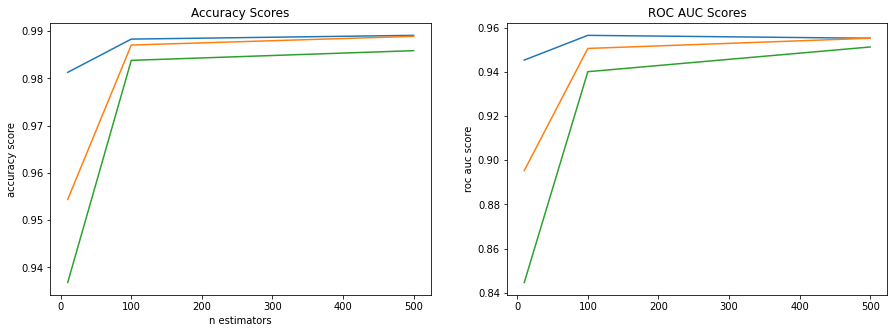

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

ax1.plot(rf_df.index, rf_df['accuracy_scores'], label = 'Random Forest')
ax1.plot(gb_df.index, gb_df['accuracy_scores'], label = 'Gradient Boosting')
ax1.plot(ada_df.index, ada_df['accuracy_scores'], label = 'AdaBoost')
ax1.set_title('Accuracy Scores')
ax1.set_xlabel('n estimators')
ax1.set_ylabel('accuracy score')

ax2.plot(rf_df.index, rf_df['roc_auc_scores'], label = 'Random Forest')
ax2.plot(gb_df.index, gb_df['roc_auc_scores'], label = 'Gradient Boosting')
ax2.plot(ada_df.index, ada_df['roc_auc_scores'], label = 'AdaBoost')
ax2.set_title('ROC AUC Scores')
ax1.set_xlabel('n estimators')
ax2.set_ylabel('roc auc score')

plt.show()